In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_merge = pd.read_csv("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\ver_1_merge_data.csv")

xgboost 모델링

In [3]:
X_features = data_merge.loc[:, ['korean', 'long_term_frgn', 'short_term_frgn', 'resident', 'card_cnt', 'card_amt', 'waste_cnt']]
y_label = data_merge.loc[:, 'waste_amt']

In [4]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(1307, 7) (327, 7)


In [5]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
# max_depth = 3, 학습률은 0.1, 목적함수(objective)는 reg:linear(회귀)
# 오류함수의 평가성능지표는 rmse
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 5,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmse',
         'early_stoppings' : 100 }
num_rounds = 1000

In [9]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:79978160.00000	eval-rmse:75629040.00000
[1]	train-rmse:72238040.00000	eval-rmse:68206360.00000
[2]	train-rmse:65269820.00000	eval-rmse:61623592.00000
[3]	train-rmse:58998940.00000	eval-rmse:55647588.00000
[4]	train-rmse:53356196.00000	eval-rmse:50246908.00000
[5]	train-rmse:48269076.00000	eval-rmse:45416100.00000
[6]	train-rmse:43697836.00000	eval-rmse:41117644.00000
[7]	train-rmse:39581860.00000	eval-rmse:372

[140]	train-rmse:2302560.50000	eval-rmse:5351755.00000
[141]	train-rmse:2300381.00000	eval-rmse:5355205.50000
[142]	train-rmse:2285985.00000	eval-rmse:5353923.50000
[143]	train-rmse:2273274.00000	eval-rmse:5349680.50000
[144]	train-rmse:2268520.00000	eval-rmse:5348498.50000
[145]	train-rmse:2249467.25000	eval-rmse:5341198.00000
[146]	train-rmse:2237652.75000	eval-rmse:5339471.00000
[147]	train-rmse:2220077.75000	eval-rmse:5337811.00000
[148]	train-rmse:2218022.25000	eval-rmse:5340852.50000
[149]	train-rmse:2201946.25000	eval-rmse:5334251.50000
[150]	train-rmse:2188573.50000	eval-rmse:5330800.00000
[151]	train-rmse:2175790.25000	eval-rmse:5329369.00000
[152]	train-rmse:2164242.25000	eval-rmse:5327411.00000
[153]	train-rmse:2160226.25000	eval-rmse:5325049.50000
[154]	train-rmse:2142592.75000	eval-rmse:5323064.50000
[155]	train-rmse:2131374.75000	eval-rmse:5318668.50000
[156]	train-rmse:2128775.00000	eval-rmse:5312322.00000
[157]	train-rmse:2118630.75000	eval-rmse:5308287.50000
[158]	trai

[288]	train-rmse:1288747.12500	eval-rmse:5217946.50000
[289]	train-rmse:1284664.12500	eval-rmse:5217574.00000
[290]	train-rmse:1277885.12500	eval-rmse:5216627.00000
[291]	train-rmse:1276892.37500	eval-rmse:5217042.00000
[292]	train-rmse:1272790.12500	eval-rmse:5215656.50000
[293]	train-rmse:1267988.62500	eval-rmse:5215420.50000
[294]	train-rmse:1258021.87500	eval-rmse:5211801.50000
[295]	train-rmse:1253297.25000	eval-rmse:5210653.50000
[296]	train-rmse:1251430.75000	eval-rmse:5211163.50000
[297]	train-rmse:1246850.87500	eval-rmse:5212331.50000
[298]	train-rmse:1240507.75000	eval-rmse:5211437.50000
[299]	train-rmse:1238176.87500	eval-rmse:5210842.50000
[300]	train-rmse:1228566.12500	eval-rmse:5209201.00000
[301]	train-rmse:1224408.75000	eval-rmse:5207950.50000
[302]	train-rmse:1220518.12500	eval-rmse:5208110.50000
[303]	train-rmse:1217227.00000	eval-rmse:5209007.00000
[304]	train-rmse:1214264.25000	eval-rmse:5210234.00000
[305]	train-rmse:1211625.87500	eval-rmse:5210607.50000
[306]	trai

[438]	train-rmse:764670.00000	eval-rmse:5198606.00000
[439]	train-rmse:761204.12500	eval-rmse:5199838.00000
[440]	train-rmse:759631.56250	eval-rmse:5199515.00000
[441]	train-rmse:758946.12500	eval-rmse:5199603.00000
[442]	train-rmse:756443.12500	eval-rmse:5199382.00000
[443]	train-rmse:753564.50000	eval-rmse:5200996.00000
[444]	train-rmse:751739.93750	eval-rmse:5202129.50000
[445]	train-rmse:749528.06250	eval-rmse:5201707.50000
[446]	train-rmse:747134.18750	eval-rmse:5201807.00000
[447]	train-rmse:745487.06250	eval-rmse:5200847.50000
[448]	train-rmse:744655.56250	eval-rmse:5200763.00000
[449]	train-rmse:742257.12500	eval-rmse:5201092.50000
[450]	train-rmse:739087.93750	eval-rmse:5201100.00000
[451]	train-rmse:736723.68750	eval-rmse:5201118.50000
[452]	train-rmse:735428.06250	eval-rmse:5201682.00000
[453]	train-rmse:734375.62500	eval-rmse:5201421.00000
[454]	train-rmse:732369.81250	eval-rmse:5201677.00000
[455]	train-rmse:729619.25000	eval-rmse:5201769.50000
[456]	train-rmse:728463.0000

[590]	train-rmse:499689.75000	eval-rmse:5210987.00000
[591]	train-rmse:497909.50000	eval-rmse:5211277.00000
[592]	train-rmse:496384.15625	eval-rmse:5211434.00000
[593]	train-rmse:496136.50000	eval-rmse:5211550.50000
[594]	train-rmse:495371.28125	eval-rmse:5211653.00000
[595]	train-rmse:494863.21875	eval-rmse:5211568.00000
[596]	train-rmse:493680.75000	eval-rmse:5211343.00000
[597]	train-rmse:492911.96875	eval-rmse:5211449.50000
[598]	train-rmse:492228.53125	eval-rmse:5211403.00000
[599]	train-rmse:491034.93750	eval-rmse:5211574.00000
[600]	train-rmse:490638.56250	eval-rmse:5212269.00000
[601]	train-rmse:489804.21875	eval-rmse:5212632.00000
[602]	train-rmse:489526.65625	eval-rmse:5212936.00000
[603]	train-rmse:488988.90625	eval-rmse:5213356.00000
[604]	train-rmse:487455.65625	eval-rmse:5213330.50000
[605]	train-rmse:486334.87500	eval-rmse:5213002.50000
[606]	train-rmse:484015.12500	eval-rmse:5212266.50000
[607]	train-rmse:480982.09375	eval-rmse:5213333.50000
[608]	train-rmse:479965.0937

[741]	train-rmse:333488.00000	eval-rmse:5206590.00000
[742]	train-rmse:331816.00000	eval-rmse:5206723.00000
[743]	train-rmse:330193.12500	eval-rmse:5206768.50000
[744]	train-rmse:328884.68750	eval-rmse:5206615.00000
[745]	train-rmse:327046.31250	eval-rmse:5206535.00000
[746]	train-rmse:326388.78125	eval-rmse:5206644.00000
[747]	train-rmse:326305.81250	eval-rmse:5206618.50000
[748]	train-rmse:325574.62500	eval-rmse:5206644.00000
[749]	train-rmse:323737.96875	eval-rmse:5206728.00000
[750]	train-rmse:323196.15625	eval-rmse:5206535.00000
[751]	train-rmse:321610.84375	eval-rmse:5206862.50000
[752]	train-rmse:320456.46875	eval-rmse:5206464.50000
[753]	train-rmse:319759.53125	eval-rmse:5206481.00000
[754]	train-rmse:319479.43750	eval-rmse:5206504.00000
[755]	train-rmse:318284.65625	eval-rmse:5206868.50000
[756]	train-rmse:317891.78125	eval-rmse:5206785.00000
[757]	train-rmse:316678.03125	eval-rmse:5206726.50000
[758]	train-rmse:315781.40625	eval-rmse:5206668.50000
[759]	train-rmse:314708.9687

[893]	train-rmse:217132.18750	eval-rmse:5205354.00000
[894]	train-rmse:216158.56250	eval-rmse:5205464.00000
[895]	train-rmse:215766.40625	eval-rmse:5205417.50000
[896]	train-rmse:215456.87500	eval-rmse:5205402.00000
[897]	train-rmse:214923.95312	eval-rmse:5205346.00000
[898]	train-rmse:214842.12500	eval-rmse:5205401.00000
[899]	train-rmse:214092.89062	eval-rmse:5205247.50000
[900]	train-rmse:213560.51562	eval-rmse:5205165.00000
[901]	train-rmse:213038.15625	eval-rmse:5205118.50000
[902]	train-rmse:212846.07812	eval-rmse:5204578.50000
[903]	train-rmse:212243.76562	eval-rmse:5204706.00000
[904]	train-rmse:211791.26562	eval-rmse:5204638.00000
[905]	train-rmse:211182.42188	eval-rmse:5204517.00000
[906]	train-rmse:210645.79688	eval-rmse:5204493.50000
[907]	train-rmse:210046.65625	eval-rmse:5204454.50000
[908]	train-rmse:209348.90625	eval-rmse:5204266.50000
[909]	train-rmse:208884.87500	eval-rmse:5204267.50000
[910]	train-rmse:208480.25000	eval-rmse:5204279.50000
[911]	train-rmse:207954.5312

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1.04996930e+07 1.85982096e+08 2.64844140e+07 2.27938848e+08
 4.48859960e+07 3.70580840e+07 6.72134160e+07 3.84086040e+07
 1.03783168e+08 1.00250104e+08]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [12]:
get_clf_eval(y_test, preds)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

feature importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

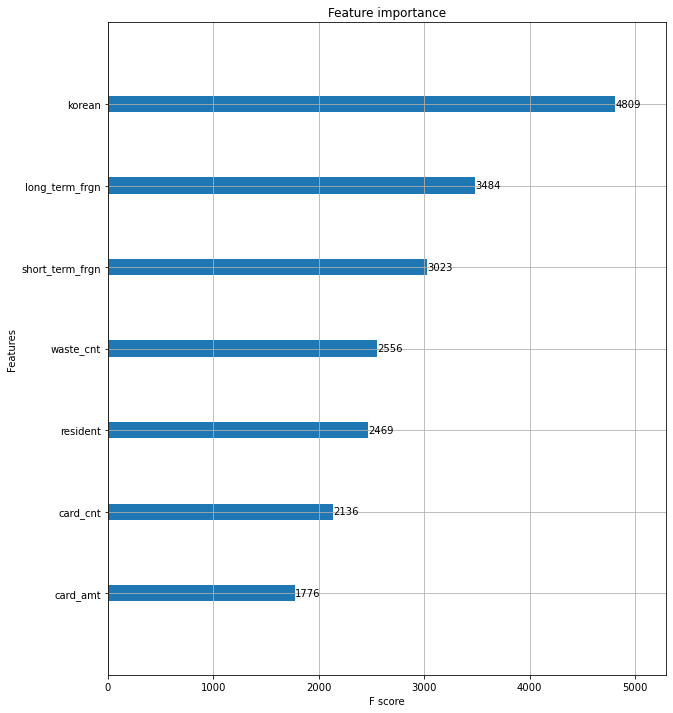

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)